In [1]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


upload kaggle.josn

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d Cornell-University/arxiv

 99% 1.20G/1.21G [00:12<00:00, 140MB/s]
100% 1.21G/1.21G [00:12<00:00, 105MB/s]


In [3]:
!unzip arxiv.zip

Archive:  arxiv.zip
  inflating: arxiv-metadata-oai-snapshot.json  


In [1]:
import pandas as pd

chunk_size = 100000
max_chunks = 30
chunks_read = 0

for chunk in pd.read_json('arxiv-metadata-oai-snapshot.json', lines=True, chunksize=chunk_size):
    output_file = f'chunk_{chunks_read+1}.csv'
    chunk.to_csv(output_file, index=False)
    print(f'Saved {output_file}')

    chunks_read += 1
    if chunks_read >= max_chunks:
        break

Saved chunk_1.csv
Saved chunk_2.csv
Saved chunk_3.csv
Saved chunk_4.csv
Saved chunk_5.csv
Saved chunk_6.csv
Saved chunk_7.csv
Saved chunk_8.csv
Saved chunk_9.csv
Saved chunk_10.csv
Saved chunk_11.csv
Saved chunk_12.csv
Saved chunk_13.csv
Saved chunk_14.csv
Saved chunk_15.csv
Saved chunk_16.csv
Saved chunk_17.csv
Saved chunk_18.csv
Saved chunk_19.csv
Saved chunk_20.csv
Saved chunk_21.csv
Saved chunk_22.csv
Saved chunk_23.csv
Saved chunk_24.csv


Total number of processed records: 400000

Column 'id': 0 NaN values
Column 'submitter': 1 NaN values
Column 'authors': 0 NaN values
Column 'title': 0 NaN values
Column 'comments': 65070 NaN values
Column 'journal-ref': 219706 NaN values
Column 'doi': 161743 NaN values
Column 'report-no': 367016 NaN values
Column 'categories': 0 NaN values
Column 'license': 43229 NaN values
Column 'versions': 0 NaN values
Column 'update_date': 0 NaN values
Column 'authors_parsed': 0 NaN values


/home/ansible/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ansible/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ansible/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


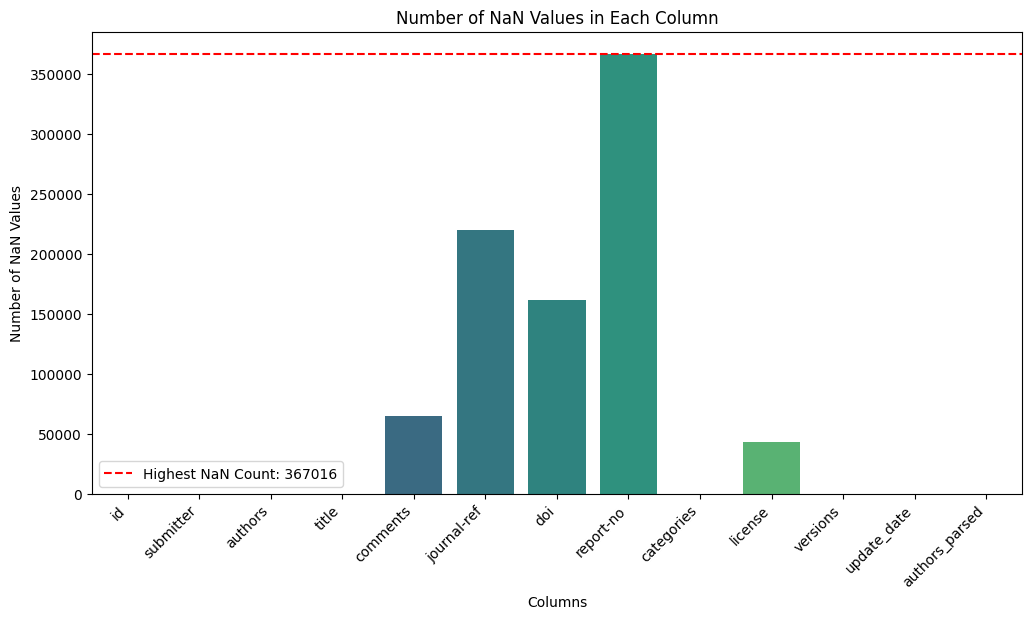


The column with the highest number of NaN values is: report-no (367016 NaN values)


In [9]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create an empty DataFrame to store the combined data
# combined_df = pd.DataFrame()

# # Assuming your chunk files are named 'chunk_1.csv', 'chunk_2.csv', ..., 'chunk_6.csv'
# for chunk_number in range(1, 10):
#     # Read each chunk and concatenate it to the combined DataFrame
#     chunk_df = pd.read_csv(f'chunk_{chunk_number}.csv')
#     combined_df = pd.concat([combined_df, chunk_df])

# # Calculate the number of NaN values in each column for the entire dataset
# nan_counts = combined_df.isnull().sum()

# # Find the column with the highest number of NaN values
# column_with_highest_nan = nan_counts.idxmax()
# max_nan_count = nan_counts.max()

# # Plot the NaN values for each column
# plt.figure(figsize=(12, 6))
# sns.barplot(x=nan_counts.index, y=nan_counts.values, palette='viridis')
# plt.xticks(rotation=45, ha='right')
# plt.title('Number of NaN Values in Each Column')
# plt.xlabel('Columns')
# plt.ylabel('Number of NaN Values')

# # Highlight the column with the highest NaN values
# plt.axhline(y=max_nan_count, color='red', linestyle='--', label=f'Highest NaN Count: {max_nan_count}')
# plt.legend()

# plt.show()

# print(f"The column with the highest number of NaN values is: {column_with_highest_nan} ({max_nan_count} NaN values)")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Assuming your chunk files are named 'chunk_1.csv', 'chunk_2.csv', ..., 'chunk_6.csv'
for chunk_number in range(1, 5):
    # Read each chunk and concatenate it to the combined DataFrame
    chunk_df = pd.read_csv(f'chunk_{chunk_number}.csv')
    combined_df = pd.concat([combined_df, chunk_df])

# Calculate the total number of processed records
total_records = len(combined_df)
combined_df.drop('abstract', axis=1, inplace=True)
# Calculate the number of NaN values in each column for the entire dataset
nan_counts = combined_df.isnull().sum()

# Find the column with the highest number of NaN values
column_with_highest_nan = nan_counts.idxmax()
max_nan_count = nan_counts.max()

# Print basic statistics
print(f"Total number of processed records: {total_records}\n")

# Print the number of NaN values in each column
for column, nan_count in nan_counts.items():
    print(f"Column '{column}': {nan_count} NaN values")

# Plot the NaN values for each column
plt.figure(figsize=(12, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')

# Highlight the column with the highest NaN values
plt.axhline(y=max_nan_count, color='red', linestyle='--', label=f'Highest NaN Count: {max_nan_count}')
plt.legend()

plt.show()

print(f"\nThe column with the highest number of NaN values is: {column_with_highest_nan} ({max_nan_count} NaN values)")



In [10]:
import pandas as pd

#Read a csv
#df_chunk1 = pd.read_csv('chunk_1.csv')

#display columns
print(combined_df.columns.tolist())
#print(df_chunk1.columns)

['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi', 'report-no', 'categories', 'license', 'versions', 'update_date', 'authors_parsed']


In [ ]:
combined_df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,NaN,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[['Balázs', 'C.', ''], ['Berger', 'E. L.', '']..."
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,NaN,NaN,NaN,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[['Streinu', 'Ileana', ''], ['Theran', 'Louis'..."
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",NaN,NaN,NaN,physics.gen-ph,NaN,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[['Pan', 'Hongjun', '']]"
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,NaN,NaN,NaN,math.CO,NaN,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[['Callan', 'David', '']]"
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,NaN,"Illinois J. Math. 52 (2008) no.2, 681-689",NaN,NaN,math.CA math.FA,NaN,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[['Abu-Shammala', 'Wael', ''], ['Torchinsky', ..."


In [3]:
# dropping papers with empty authers
print(combined_df.shape)
combined_df.dropna(subset=['authors'], inplace=True)

print (combined_df.shape)

# Dropping papers with short titles less than 5 letters  
#df=pd.DataFrame()

min_title_length = 5

#df['title'] = combined_df['title']
combined_df['title_length']= combined_df['title'].str.len()
combined_df.drop(combined_df[combined_df['title_length'] < min_title_length].index, inplace=True)

# Find the row with the shortest text
print (combined_df.shape)
shortest_text_row = combined_df.loc[combined_df['title_length'].idxmin()]
combined_df.drop(columns='title_length', inplace=True)
print (combined_df.shape)
# # Plot a bar chart of text lengths
# df.plot(kind='bar', x='title', y='Text Length', legend=False)
# plt.title('Text Lengths')
# plt.xlabel('Text')
# plt.ylabel('Length')
# plt.show()

# Print information about the row with the shortest text
# print("\nRow with the shortest text:")
# print(shortest_text_row)

(400000, 13)
(400000, 13)
(399984, 14)
(399984, 13)


**Finding citations** in different Categories 

listing  unique categories 

In [4]:
df =pd.DataFrame()
unique_categories = combined_df['categories'].unique()
# Function to get unique values from space-separated categories
def get_unique_categories(row):
    categories_list = row['categories'].split()
    unique_categories = set(categories_list)
    return ' '.join(unique_categories)

# Apply the function to create a new column with unique values

df['unique_categories'] = combined_df.apply(get_unique_categories, axis=1)

# Split the space-separated values and explode the column
df_expanded = df['unique_categories'].str.split(expand=True).stack().reset_index(level=1, drop=True).to_frame('category')

# Remove duplicates
df_expanded = df_expanded.drop_duplicates()
# Display the result
print(df_expanded)

             category
0              hep-ph
1             math.CO
1               cs.CG
2      physics.gen-ph
4             math.FA
...               ...
35819         eess.SY
86462         econ.GN
25881         eess.IV
92515         eess.AS
57242         eess.SP

[155 rows x 1 columns]


In [13]:
# Save the categorise into a file if needed 
df_expanded.to_csv('Category.csv', sep=',', index=False, encoding='utf-8')

Mapping Function 

In [5]:
import pandas as pd
import json

Category_mapping = """
[
    {
        "category": "Physics",
        "subcategories": [
            {
                "name": "Phenomenology",
                "code": "hep-ph",
                "description": "Focuses on applying the theoretical framework of high energy physics to observable phenomena and particle interactions."
            },
            {
                "name": "Theory",
                "code": "hep-th",
                "description": "Explores the fundamental theoretical concepts and models underlying high energy physics."
            },
            {
                "name": "Experiment",
                "code": "hep-ex",
                "description": "Designs and conducts experiments to test and validate theoretical models and understand the properties of subatomic particles."
            },
            {
                "name": "Lattice Field Theory",
                "code": "hep-lat",
                "description": "Uses computational methods to study the behavior of quantum fields on a discrete lattice, particularly in the context of high energy physics."
            },
            {
                "name": "Nuclear Theory",
                "code": "nucl-th",
                "description": "Applies theoretical frameworks to understand the structure and behavior of atomic nuclei, nuclear reactions, and nuclear matter."
            },
            {
                "name": "Nuclear Experiment",
                "code": "nucl-ex",
                "description": "Conducts experiments to study the properties of atomic nuclei, nuclear reactions, and nuclear matter."
            },
            {
                "name": "Mesoscopic, nanoscale, and low-dimensional systems",
                "code": "cond-mat.mes-hall",
                "description": "Focuses on the physics of materials confined to small scales, where size effects become significant."
            },
                    {
                        "name": "Materials science",
                        "code": "cond-mat.mtrl-sci",
                        "description": "Investigates the properties and behavior of materials, including their structure, electronic, and optical properties."
                    },
                    {
                        "name": "Statistical mechanics",
                        "code": "cond-mat.stat-mech",
                        "description": "Applies statistical mechanics to study the collective behavior of large systems of particles in condensed matter."
                    },
                    {
                        "name": "Strongly correlated electron systems",
                        "code": "cond-mat.str-el",
                        "description": "Explores the behavior of electrons in materials where their interactions are strong, leading to exotic phenomena like superconductivity and magnetism."
                    },
                    {
                        "name": "Soft matter",
                        "code": "cond-mat.soft",
                        "description": "Studies the physics of soft materials, such as polymers, colloids, and biological materials."
                    },
                    {
                        "name": "Disordered systems and neural networks",
                        "code": "cond-mat.dis-nn",
                        "description": "Focuses on the behavior of disordered materials and neural networks, where randomness plays a crucial role."
                    },
                    {
                        "name": "Other condensed matter topics",
                        "code": "cond-mat.other",
                        "description": "Includes research on a variety of other topics in condensed matter physics, not fitting into other subcategories."
                    },
                    {
                        "name": "Superconductivity",
                        "code": "cond-mat.supr-con",
                        "description": "Explores the phenomenon of superconductivity, where materials exhibit zero electrical resistance at low temperatures."
                    },
                    {
                        "name": "Quantum gases",
                        "code": "cond-mat.quant-gas",
                        "description": "Studies the behavior of ultracold atomic gases, where quantum effects become significant."
                    }
             ,
            {
                "name": "General Relativity and Quantum Cosmology",
                "code": "gr-qc",
                "description": "Studies the fundamental concepts of gravitation and the implications of Einstein's theory of general relativity, including cosmology and black holes."
            },
            {
                        "name": "Cosmology and gravitation",
                        "code": "astro-ph.CO",
                        "description": "Studies the large-scale structure, evolution, and dynamics of the universe, including cosmological models and nongalactic astrophysical phenomena."
                    },
            {
                        "name": "High Energy Astrophysical Phenomena",
                        "code": "astro-ph.HE",
                        "description": "Studies astrophysical phenomena involving high-energy processes, such as gamma-ray bursts, active galactic nuclei, and cosmic rays."
             },
            {
                        "name": "Solar and Stellar Astrophysics",
                        "code": "astro-ph.SR",
                        "description": "Focuses on the study of the Sun, stars, and stellar systems, including their structure, evolution, and observable characteristics."
                    },
            {
                        "name": "Instrumentation and Methods for Astrophysics",
                        "code": "astro-ph.IM",
                        "description": "Involves the development and application of instruments and methods for observing and measuring celestial objects and phenomena."
                    },
            {
                        "name": "Galaxy Astrophysics",
                        "code": "astro-ph.GA",
                        "description": "Studies galaxies, including their formation, structure, dynamics, and interactions within the broader cosmic environment."
                    },
            {
                        "name": "Earth and Planetary Astrophysics",
                        "code": "astro-ph.EP",
                        "description": "Focuses on the study of Earth, planets, and other celestial bodies in the solar system, exploring their composition, dynamics, and atmospheres."
                    },
            {
                "name": "Optics",
                "code": "physics.optics",
                "description": "Studies the behavior and properties of light, including its interactions with matter and various optical phenomena."
            },
            {
                "name": "Computational Physics",
                "code": "physics.comp-ph",
                "description": "Involves the use of computational methods and simulations to study physical phenomena and solve complex problems in physics."
            },
            {
                "name": "Plasma Physics",
                "code": "physics.plasm-ph",
                "description": "Focuses on the study of plasma, a state of matter with ionized particles, and its properties, behavior, and applications in various contexts."
            },
            {
                "name": "Educational Physics",
                "code": "physics.ed-ph",
                "description": "Addresses the educational aspects of physics, including teaching methods, curriculum development, and learning strategies."
            },
            {
                "name": "Popular Physics",
                "code": "physics.pop-ph",
                "description": "Engages with popular science topics in physics, making scientific concepts accessible to a wider audience."
            },
            {
                "name": "Chemical Physics",
                "code": "physics.chem-ph",
                "description": "Involves the study of the physical principles governing chemical systems and reactions, often using techniques from physics."
            },
            {
                "name": "General Physics",
                "code": "physics.gen-ph",
                "description": "Encompasses various areas of general physics that may not fall into specific subcategories, covering a broad range of physical topics."
            },
            {
                "name": "Space Physics",
                "code": "physics.space-ph",
                "description": "Studies the physical processes and phenomena occurring in space, including the behavior of celestial bodies and cosmic environments."
            },
            {
                "name": "Social Physics",
                "code": "physics.soc-ph",
                "description": "Applies physical principles and methods to study social phenomena, such as human behavior and societal dynamics."
            },
            {
                "name": "Fluid Dynamics",
                "code": "physics.flu-dyn",
                "description": "Studies the motion and behavior of fluids, including liquids and gases, and their interactions with solid boundaries."
            },
            {
                "name": "Data Analysis, Statistics, and Probability",
                "code": "physics.data-an",
                "description": "Involves the analysis of experimental and observational data, statistical methods, and probability theory in the context of physics."
            },
            {
                "name": "Classical Physics",
                "code": "physics.class-ph",
                "description": "Focuses on the fundamental principles of classical physics, including classical mechanics and classical electromagnetism."
            },
            {
                "name": "Biological Physics",
                "code": "physics.bio-ph",
                "description": "Applies physical principles and methods to study biological systems and processes, bridging the gap between physics and biology."
            },
            {
                "name": "Atomic Physics",
                "code": "physics.atom-ph",
                "description": "Studies the behavior and properties of atoms, including atomic structure, interactions, and spectroscopy."
            },
            {
                "name": "Atomic and Molecular Clusters",
                "code": "physics.ao-ph",
                "description": "Focuses on the study of clusters of atoms and molecules, exploring their properties, structures, and behavior."
            },
            {
                "name": "Instrumentation and Detectors",
                "code": "physics.ins-det",
                "description": "Involves the design, development, and use of instruments and detectors for measuring physical quantities and phenomena in various experiments."
            },
            {
                "name": "Geophysics",
                "code": "physics.geo-ph",
                "description": "Applies principles of physics to the study of the Earth's structure, composition, and processes, including seismology and geodynamics."
            },
            {
                "name": "Applied Physics",
                "code": "physics.app-ph",
                "description": "Applies physical principles to address practical and real-world problems, often involving technological applications."
            },
            {
                "name": "Atmospheric and Oceanic Physics",
                "code": "physics.atm-clus",
                "description": "Studies the physics of the Earth's atmosphere and oceans, including atmospheric dynamics, climate science, and oceanography."
            },
            {
                "name": "Accelerator Physics",
                "code": "physics.acc-ph",
                "description": "Focuses on the study of particle accelerators, including their design, operation, and applications in high-energy physics."
            },
            {
                "name": "History and Philosophy of Physics",
                "code": "physics.hist-ph",
                "description": "Examines the historical development and philosophical foundations of physics, exploring the evolution of physical theories and ideas."
            },
            {
                "name": "Medical Physics",
                "code": "physics.med-ph",
                "description": "Applies principles of physics to medical imaging, radiation therapy, and other healthcare technologies."
            }
        ]
    },
    {
        "category": "Computer Science",
        "subcategories": [
            {
                "name": "Computer Graphics",
                "code": "cs.CG",
                "description": "Covers the field of computer graphics, including algorithms, techniques, and applications for creating and manipulating visual images."
            },
            {
                "name": "Machine Learning",
                "code": "cs.MS",
                "description": "Focuses on the development of algorithms and models that enable computers to learn patterns and make decisions without explicit programming."
            },
            {
                "name": "Computer Engineering",
                "code": "cs.CE",
                "description": "Explores the design and development of computer systems, hardware, and software components for various applications."
            },
            {
                "name": "Numerical Analysis",
                "code": "cs.NA",
                "description": "Involves the study of algorithms for solving mathematical problems through numerical approximation and computation."
            },
            {
                "name": "Information Theory",
                "code": "cs.IT",
                "description": "Deals with the quantification of information and its transmission, including coding theory and compression algorithms."
            },
            {
                "name": "Neural Networks",
                "code": "cs.NE",
                "description": "Focuses on the study and development of artificial neural networks, inspired by the human brain, for machine learning applications."
            },
            {
                "name": "Artificial Intelligence",
                "code": "cs.AI",
                "description": "Encompasses the development of intelligent agents capable of autonomous decision-making and problem-solving."
            },
            {
                "name": "Data Mining",
                "code": "cs.DM",
                "description": "Involves the extraction of patterns and knowledge from large datasets, utilizing techniques from machine learning and statistics."
            },
            {
                "name": "Logic",
                "code": "cs.LO",
                "description": "Studies the principles of valid reasoning and inference, with applications in computer science and philosophy."
            },
            {
                "name": "Software Development",
                "code": "cs.SD",
                "description": "Focuses on the process of designing, programming, testing, and maintaining software applications and systems."
            },
            {
                "name": "Computer Graphics",
                "code": "cs.GR",
                "description": "Covers the field of computer graphics, including algorithms, techniques, and applications for creating and manipulating visual images."
            },
            {
                "name": "Systems Science",
                "code": "cs.SY",
                "description": "Studies complex systems and their interactions, including modeling, analysis, and control of dynamic systems."
            },
            {
                "name": "Data Structures",
                "code": "cs.DS",
                "description": "Focuses on the study of organizing and storing data for efficient retrieval and manipulation in algorithms and programs."
            },
            {
                "name": "Computational Complexity",
                "code": "cs.CC",
                "description": "Examines the inherent difficulty of solving computational problems, including classifications of computational problems."
            },
            {
                "name": "Human-Computer Interaction",
                "code": "cs.HC",
                "description": "Studies the design and use of computer technology, focusing on the interaction between humans and computers."
            },
            {
                "name": "Deep Learning",
                "code": "cs.DL",
                "description": "Involves the training and development of deep neural networks for complex pattern recognition and decision-making tasks."
            },
            {
                "name": "Operating Systems",
                "code": "cs.OH",
                "description": "Focuses on the design, implementation, and management of operating systems that control computer hardware and software resources."
            },
            {
                "name": "Database Systems",
                "code": "cs.DB",
                "description": "Involves the study of database design, management, and optimization for efficient storage and retrieval of information."
            },
            {
                "name": "Programming Languages",
                "code": "cs.PL",
                "description": "Studies the design and implementation of programming languages, including syntax, semantics, and compilers."
            },
            {
                "name": "Cryptocurrency",
                "code": "cs.CR",
                "description": "Focuses on the design and analysis of cryptographic techniques for secure communication and digital currency systems."
            },
            {
                "name": "Networks",
                "code": "cs.NI",
                "description": "Involves the study of computer networks, including protocols, data transmission, and network security."
            },
            {
                "name": "Machine Learning",
                "code": "cs.LG",
                "description": "Focuses on the development of algorithms and models that enable computers to learn patterns and make decisions without explicit programming."
            },
            {
                "name": "Performance Evaluation",
                "code": "cs.PF",
                "description": "Studies the assessment and optimization of the performance of computer systems and algorithms."
            },
            {
                "name": "Software Engineering",
                "code": "cs.SE",
                "description": "Involves the systematic design, development, testing, and maintenance of software applications and systems."
            },
            {
                "name": "Artificial Intelligence",
                "code": "cs.AR",
                "description": "Encompasses the development of intelligent agents capable of autonomous decision-making and problem-solving."
            },
            {
                "name": "Symbolic Computation",
                "code": "cs.SC",
                "description": "Involves the manipulation of symbolic expressions and mathematical computation, often using computer algebra systems."
            },
            {
                "name": "Cybersecurity",
                "code": "cs.CY",
                "description": "Focuses on the protection of computer systems, networks, and data from unauthorized access, attacks, and damage."
            },
            {
                "name": "Information Retrieval",
                "code": "cs.IR",
                "description": "Involves the extraction of relevant information from large datasets, often in the context of search engines and information systems."
            },
            {
                "name": "Graph Theory",
                "code": "cs.GT",
                "description": "Studies the mathematical structures of graphs and their applications in various fields, including computer science and network analysis."
            },
            {
                "name": "Distributed Computing",
                "code": "cs.DC",
                "description": "Focuses on the design and implementation of algorithms for distributed systems and parallel computing."
            },
            {
                "name": "Mathematics",
                "code": "cs.MA",
                "description": "Involves the application of mathematical principles and methods in solving problems related to computer science."
            },
            {
                "name": "Computational Linguistics",
                "code": "cs.CL",
                "description": "Applies computational methods and techniques to the study of human language, including natural language processing and machine translation."
            },
            {
                "name": "Computer Vision",
                "code": "cs.CV",
                "description": "Focuses on enabling computers to interpret and understand visual information from the world, including image and video analysis."
            }
        ]
    },
    {
        "category": "Mathematics",
        "subcategories": [
            {
                "name": "Combinatorics",
                "code": "math.CO",
                "description": "Studies combinations, permutations, and arrangements of objects, often involving discrete structures and counting methods."
            },
            {
                "name": "Complex Analysis",
                "code": "math.CA",
                "description": "Focuses on the properties and behavior of complex numbers, functions, and mappings in mathematical analysis."
            },
            {
                "name": "Functional Analysis",
                "code": "math.FA",
                "description": "Studies vector spaces, operators, and function spaces, with applications in mathematical analysis and quantum mechanics."
            },
            {
                "name": "Algebraic Geometry",
                "code": "math.AG",
                "description": "Involves the study of algebraic varieties and geometric objects defined by polynomial equations, with applications in algebraic number theory."
            },
            {
                "name": "Number Theory",
                "code": "math.NT",
                "description": "Focuses on the properties and relationships of integers and related structures, including prime numbers and Diophantine equations."
            },
            {
                "name": "Algebraic Topology",
                "code": "math.AT",
                "description": "Studies topological spaces and continuous maps, emphasizing algebraic invariants and constructions."
            },
            {
                "name": "Probability",
                "code": "math.PR",
                "description": "Studies the likelihood and uncertainty of events, often involving random variables, stochastic processes, and statistical analysis."
            },
            {
                "name": "Numerical Analysis",
                "code": "math.NA",
                "description": "Involves the study of algorithms for solving mathematical problems through numerical approximation and computation."
            },
            {
                "name": "Rings and Algebras",
                "code": "math.RA",
                "description": "Focuses on the study of algebraic structures, including rings, algebras, and their properties and applications."
            },
            {
                "name": "Operator Algebras",
                "code": "math.OA",
                "description": "Studies algebras of operators on Hilbert spaces, with applications in functional analysis and quantum mechanics."
            },
            {
                "name": "Mathematical Physics",
                "code": "math-ph",
                "description": "Applies mathematical methods and techniques to the study of physical phenomena and theoretical physics."
            },
            {
                "name": "Quantum Algebra",
                "code": "math.QA",
                "description": "Involves the study of algebraic structures related to quantum mechanics, including quantum groups and algebras."
            },
            {
                "name": "Mathematical Physics",
                "code": "math.MP",
                "description": "Applies mathematical methods and techniques to the study of physical phenomena and theoretical physics."
            },
            {
                "name": "Information Theory",
                "code": "math.IT",
                "description": "Deals with the quantification of information and its transmission, including coding theory and compression algorithms."
            },
            {
                "name": "Complex Analysis",
                "code": "math.CV",
                "description": "Focuses on the properties and behavior of complex numbers, functions, and mappings in mathematical analysis."
            },
            {
                "name": "Dynamical Systems",
                "code": "math.DS",
                "description": "Studies the behavior of dynamic systems over time, often involving differential equations and chaos theory."
            },
            {
                "name": "Differential Geometry",
                "code": "math.DG",
                "description": "Involves the study of smooth manifolds and geometric structures, often using differential and integral calculus."
            },
            {
                "name": "Representation Theory",
                "code": "math.RT",
                "description": "Studies abstract algebraic structures through their representations, often involving linear algebra and group theory."
            },
            {
                "name": "Graph Theory",
                "code": "math.GR",
                "description": "Studies the mathematical structures of graphs and their applications in various fields, including computer science and network analysis."
            },
            {
                "name": "Algebraic Combinatorics",
                "code": "math.AC",
                "description": "Combines methods from algebra and combinatorics to study combinatorial structures and their algebraic properties."
            },
            {
                "name": "Symplectic Geometry",
                "code": "math.SG",
                "description": "Studies symplectic manifolds and their geometric properties, often in the context of classical mechanics and Hamiltonian dynamics."
            },
            {
                "name": "K-Theory",
                "code": "math.KT",
                "description": "Involves the study of algebraic structures associated with vector bundles and projective modules, with applications in topology and geometry."
            },
            {
                "name": "Geometric Topology",
                "code": "math.GT",
                "description": "Focuses on the properties and classification of topological spaces, often emphasizing geometric aspects and structures."
            },
            {
                "name": "Algebraic Probability",
                "code": "math.AP",
                "description": "Applies algebraic methods to the study of probability theory and stochastic processes."
            },
            {
                "name": "Metric Geometry",
                "code": "math.MG",
                "description": "Studies geometric properties of metric spaces and their applications, often involving distances and measures."
            },
            {
                "name": "Category Theory",
                "code": "math.CT",
                "description": "Studies abstract and general properties of mathematical structures and relationships between them, often involving functors and natural transformations."
            },
            {
                "name": "Symplectic Topology",
                "code": "math.SP",
                "description": "Focuses on the study of symplectic manifolds and their topological properties, often in the context of Hamiltonian dynamics."
            },
            {
                "name": "Statistical Theory",
                "code": "math.ST",
                "description": "Studies statistical methods and models for data analysis, including estimation, hypothesis testing, and regression analysis."
            },
            {
                "name": "Geometric Measure Theory",
                "code": "math.GM",
                "description": "Involves the study of measures and their geometric properties, often in the context of Euclidean spaces and geometric analysis."
            },
            {
                "name": "Logic",
                "code": "math.LO",
                "description": "Studies the principles of valid reasoning and inference, with applications in mathematics and philosophy."
            },
            {
                "name": "Optimization and Control",
                "code": "math.OC",
                "description": "Studies methods for optimizing and controlling systems, often involving mathematical models, algorithms, and decision-making."
            },
            {
                "name": "General Mathematics",
                "code": "math.GN",
                "description": "Encompasses various areas of general mathematics that may not fall into specific subcategories, covering a broad range of mathematical topics."
            },
            {
                "name": "History and Overview",
                "code": "math.HO",
                "description": "Focuses on the historical development and overview of mathematical concepts, theories, and contributions throughout different periods."
            }
        ]
    },
    {
        "category": "Nonlinear Sciences",
        "subcategories": [
            {
                "name": "Atmospheric and Oceanic Physics",
                "code": "nlin.AO",
                "description": "Studies nonlinear phenomena and dynamics in atmospheric and oceanic systems, exploring complex behaviors and patterns."
            },
            {
                "name": "Pattern Formation and Solitons",
                "code": "nlin.PS",
                "description": "Investigates the spontaneous emergence of patterns and solitary waves in nonlinear systems, including applications in physics and biology."
            },
            {
                "name": "Chaotic Dynamics",
                "code": "nlin.CD",
                "description": "Studies chaotic behavior and dynamics in nonlinear systems, exploring sensitive dependence on initial conditions and deterministic chaos."
            },
            {
                "name": "Systems and Integrable Systems",
                "code": "nlin.SI",
                "description": "Focuses on the study of integrable systems and their properties, often involving the analysis of nonlinear differential equations and symmetries."
            },
            {
                "name": "Computer Graphics",
                "code": "nlin.CG",
                "description": "Involves the application of nonlinear methods to computer graphics, including the generation of realistic images and animations."
            }
        ]
    },
    {
        "category": "Quantitative Biology",
        "subcategories": [
            {
                "name": "Molecular Networks",
                "code": "q-bio.MN",
                "description": "Studies the networks of molecular interactions within biological systems, exploring their structure, dynamics, and functional implications."
            },
            {
                "name": "Populations and Evolution",
                "code": "q-bio.PE",
                "description": "Investigates population dynamics and evolutionary processes in biological systems, exploring genetic variation and adaptation."
            },
            {
                "name": "Cell Behavior",
                "code": "q-bio.CB",
                "description": "Studies the behavior of individual cells and their interactions, exploring cellular processes and functions."
            },
            {
                "name": "Quantitative Methods",
                "code": "quant-ph",
                "description": "Involves the application of quantitative methods, often from physics and mathematics, to study biological systems and processes."
            },
            {
                "name": "Quantitative Methods",
                "code": "q-bio.QM",
                "description": "Involves the application of quantitative methods, often from physics and mathematics, to study biological systems and processes."
            },
            {
                "name": "Other",
                "code": "q-bio.OT",
                "description": "Includes topics in quantitative biology that do not fall into specific subcategories, covering a broad range of quantitative biological research."
            },
            {
                "name": "Biomolecules",
                "code": "q-bio.BM",
                "description": "Studies the structure, function, and interactions of biomolecules, including proteins, nucleic acids, and lipids."
            },
            {
                "name": "Neurons and Cognition",
                "code": "q-bio.NC",
                "description": "Investigates the behavior of neurons and cognitive processes in the brain, exploring neural networks and information processing."
            },
            {
                "name": "Subcellular Processes",
                "code": "q-bio.SC",
                "description": "Studies processes that occur at the subcellular level, exploring cellular organelles, transport, and molecular dynamics."
            },
            {
                "name": "Genomics",
                "code": "q-bio.GN",
                "description": "Focuses on the study of genomes, including genome sequencing, gene expression, and the computational analysis of genetic data."
            },
            {
                "name": "Tissues and Organs",
                "code": "q-bio.TO",
                "description": "Studies the structure, function, and interactions of tissues and organs in biological systems, exploring organ-level processes and dynamics."
            }
        ]
    },
    {
        "category": "Quantitative Finance",
        "subcategories": [
            {
                "name": "General Quantitative Finance",
                "code": "q-fin.GN",
                "description": "Encompasses various areas of quantitative finance that may not fall into specific subcategories, covering a broad range of financial topics."
            },
            {
                "name": "Statistical Finance",
                "code": "q-fin.ST",
                "description": "Involves the use of statistical methods and models to analyze financial markets, price movements, and risk factors."
            },
            {
                "name": "Portfolio Management",
                "code": "q-fin.PR",
                "description": "Studies the principles and strategies for managing investment portfolios, including asset allocation and risk management."
            },
            {
                "name": "Computational Finance",
                "code": "q-fin.CP",
                "description": "Involves the application of computational methods and algorithms to analyze financial markets, pricing models, and risk assessment."
            },
            {
                "name": "Risk Management",
                "code": "q-fin.RM",
                "description": "Focuses on the identification, assessment, and mitigation of financial risks, including market risk, credit risk, and operational risk."
            },
            {
                "name": "Personal Finance",
                "code": "q-fin.PM",
                "description": "Studies personal finance topics, including budgeting, investment strategies, and financial planning for individuals and households."
            },
            {
                "name": "Trading and Market Microstructure",
                "code": "q-fin.TR",
                "description": "Studies trading strategies, market dynamics, and microstructure effects in financial markets, including high-frequency trading and liquidity issues."
            },
            {
                "name": "Econometrics",
                "code": "q-fin.EC",
                "description": "Involves the application of econometric methods to analyze financial data and relationships between economic variables in finance."
            },
            {
                "name": "Mathematical Finance",
                "code": "q-fin.MF",
                "description": "Applies mathematical methods to model and analyze financial markets, derivative pricing, and risk management."
            }
        ]
    },
    {
        "category": "Statistics",
        "subcategories": [
            {
                "name": "Mathematical Statistics",
                "code": "stat.ME",
                "description": "Focuses on the mathematical foundations and methods of statistics, including probability theory, inference, and hypothesis testing."
            },
            {
                "name": "Applied Statistics",
                "code": "stat.AP",
                "description": "Applies statistical methods to analyze and interpret data in various fields, including social sciences, engineering, and natural sciences."
            },
            {
                "name": "Machine Learning",
                "code": "stat.ML",
                "description": "Involves the development and application of algorithms and models for machine learning and data-driven decision-making."
            },
            {
                "name": "Other Statistics",
                "code": "stat.OT",
                "description": "Includes topics in statistics that do not fall into specific subcategories, covering a broad range of statistical research."
            },
            {
                "name": "Theoretical Statistics",
                "code": "stat.TH",
                "description": "Focuses on the development of theoretical concepts and methods in statistics, including the mathematical properties of statistical procedures."
            },
            {
                "name": "Computational Statistics",
                "code": "stat.CO",
                "description": "Involves the use of computational methods and algorithms for statistical analysis, modeling, and simulation."
            }
        ]
    },
    {
        "category": "Economics",
        "subcategories": [
            {
                "name": "Econometrics",
                "code": "econ.EM",
                "description": "Applies statistical methods"
            },
            {
                "name": "Econometrics",
                "code": "econ.TH",
                "description": "Applies statistical methods to economic data to test hypotheses and forecast future trends."
            }
        ]
    },
    {
        "category": "Electrical Engineering and Systems Science",
        "subcategories": [
            {
                "name": "Systems and Control",
                "code": "eess.SY",
                "description": "Studies the modeling, analysis, and control of complex systems, often in the context of electrical and electronic systems."
            },
            {
                "name": "General Economics",
                "code": "econ.GN",
                "description": "Covers various areas of general economics that may not fall into specific subcategories, encompassing a broad range of economic topics."
            },
            {
                "name": "Image and Video Processing",
                "code": "eess.IV",
                "description": "Focuses on the analysis, manipulation, and interpretation of visual information, including images and videos."
            },
            {
                "name": "Acoustics",
                "code": "eess.AS",
                "description": "Studies the generation, transmission, and reception of sound, often in the context of signal processing and audio systems."
            },
            {
                "name": "Signal Processing",
                "code": "eess.SP",
                "description": "Involves the analysis, interpretation, and manipulation of signals, including applications in telecommunications and audio processing."
            }
        ]
    }
]"""
Category_lookup= {
"hep-ph":"Physics",
"hep-th":"Physics",
"hep-ex":"Physics",
"hep-lat":"Physics",
"nucl-th":"Physics",
"nucl-ex":"Physics",
"cond-mat.mes-hall":"Physics",
"cond-mat.mtrl-sci":"Physics",
"cond-mat.stat-mech":"Physics",
"cond-mat.str-el":"Physics",
"cond-mat.soft":"Physics",
"cond-mat.dis-nn":"Physics",
"cond-mat.other":"Physics",
"cond-mat.supr-con":"Physics",
"cond-mat.quant-gas":"Physics",
"gr-qc":"Physics",
"astro-ph":"Physics",
"astro-ph.CO":"Physics",
"astro-ph.HE":"Physics",
"astro-ph.SR":"Physics",
"astro-ph.IM":"Physics",
"astro-ph.GA":"Physics",
"astro-ph.EP":"Physics",
"physics.optics":"Physics",
"physics.comp-ph":"Physics",
"physics.plasm-ph":"Physics",
"physics.ed-ph":"Physics",
"physics.pop-ph":"Physics",
"physics.chem-ph":"Physics",
"physics.gen-ph":"Physics",
"physics.space-ph":"Physics",
"physics.soc-ph":"Physics",
"physics.flu-dyn":"Physics",
"physics.data-an":"Physics",
"physics.class-ph":"Physics",
"physics.bio-ph":"Physics",
"physics.atom-ph":"Physics",
"physics.ao-ph":"Physics",
"physics.ins-det":"Physics",
"physics.geo-ph":"Physics",
"physics.app-ph":"Physics",
"physics.atm-clus":"Physics",
"physics.acc-ph":"Physics",
"physics.hist-ph":"Physics",
"physics.med-ph":"Physics",            
"cs.CG":"Computer Science",
"cs.MS":"Computer Science",
"cs.CE":"Computer Science",
"cs.NA":"Computer Science",
"cs.IT":"Computer Science",
"cs.NE":"Computer Science",
"cs.AI":"Computer Science",
"cs.DM":"Computer Science",
"cs.LO":"Computer Science",
"cs.SD":"Computer Science",
"cs.GR":"Computer Science",
"cs.SY":"Computer Science",
"cs.DS":"Computer Science",
"cs.CC":"Computer Science",
"cs.HC":"Computer Science",
"cs.DL":"Computer Science",
"cs.RO":"Computer Science",
"cs.OH":"Computer Science",
"cs.DB":"Computer Science",
"cs.PL":"Computer Science",
"cs.CR":"Computer Science",
"cs.NI":"Computer Science",
"cs.LG":"Computer Science",
"cs.PF":"Computer Science",
"cs.SE":"Computer Science",
"cs.AR":"Computer Science",
"cs.SC":"Computer Science",
"cs.CY":"Computer Science",
"cs.IR":"Computer Science",
"cs.GT":"Computer Science",
"cs.DC":"Computer Science",
"cs.MA":"Computer Science",
"cs.CL":"Computer Science",
"cs.CV":"Computer Science",
"cs.ET":"Computer Science",
"cs.MM":"Computer Science",
"cs.GL":"Computer Science",
"cs.FL":"Computer Science",
"cs.OS":"Computer Science",
"cs.SI":"Computer Science",
"math.CO": "Mathematics",
"math.CA": "Mathematics",
"math.FA": "Mathematics",
"math.AG": "Mathematics",
"math.NT": "Mathematics",
"math.AT": "Mathematics",
"math.PR": "Mathematics",
"math.NA": "Mathematics",
"math.RA": "Mathematics",
"math.OA": "Mathematics",
"math-ph": "Mathematics",
"math.QA": "Mathematics",
"math.MP": "Mathematics",
"math.IT": "Mathematics",
"math.CV": "Mathematics",
"math.DS": "Mathematics",
"math.DG": "Mathematics",
"math.RT": "Mathematics",
"math.GR": "Mathematics",
"math.AC": "Mathematics",
"math.SG": "Mathematics",
"math.KT": "Mathematics",
"math.GT": "Mathematics",
"math.AP": "Mathematics",
"math.MG": "Mathematics",
"math.CT": "Mathematics",
"math.SP": "Mathematics",
"math.ST": "Mathematics",
"math.GM": "Mathematics",
"math.LO": "Mathematics",
"math.OC": "Mathematics",
"math.GN": "Mathematics",
"math.HO": "Mathematics",
"nlin.AO": "Nonlinear Sciences",
"nlin.PS": "Nonlinear Sciences",
"nlin.CD": "Nonlinear Sciences",
"nlin.SI": "Nonlinear Sciences",
"nlin.CG": "Nonlinear Sciences",
"q-bio.MN": "Quantitative Biology",
"q-bio.PE": "Quantitative Biology",
"q-bio.CB": "Quantitative Biology",
"q-bio.TO": "Quantitative Biology",
"quant-ph": "Quantitative Biology",
"q-bio.QM": "Quantitative Biology",
"q-bio.OT": "Quantitative Biology",
"q-bio.BM": "Quantitative Biology",
"q-bio.NC": "Quantitative Biology",
"q-bio.SC": "Quantitative Biology",
"q-bio.GN": "Quantitative Biology",
"q-fin.GN": "Quantitative Finance",
"q-fin.ST": "Quantitative Finance",
"q-fin.PR": "Quantitative Finance",
"q-fin.CP": "Quantitative Finance",
"q-fin.RM": "Quantitative Finance",
"q-fin.PM": "Quantitative Finance",
"q-fin.TR": "Quantitative Finance",
"q-fin.EC": "Quantitative Finance",
"q-fin.MF": "Quantitative Finance",
"stat.ME":"Statistics",
"stat.AP":"Statistics",
"stat.ML":"Statistics",
"stat.OT":"Statistics",
"stat.TH":"Statistics",
"stat.CO":"Statistics",
"econ.EM": "Economics",
"econ.TH": "Economics",
"eess.SY": "Electrical Engineering and Systems Science",
"econ.GN": "Electrical Engineering and Systems Science",
"eess.IV": "Electrical Engineering and Systems Science",
"eess.AS": "Electrical Engineering and Systems Science",
"eess.SP": "Electrical Engineering and Systems Science",
}

# Load JSON mapping
#mapping_data = json.loads(Category_mapping)
# Flatten the JSON into a dictionary for easy lookup
#flat_mapping = {}

# for category in mapping_data:
#         category_name = category['category']
#         subcategory_codes = [sub['code'] for sub in category.get('subcategories', [])]
#         flat_mapping[category_name] = {
#             'category': category_name,
#             'codes': subcategory_codes
#         }

# Function to map category code to general category
def map_to_general_category(categories):
    category_list = categories.split()
    mapped_categories = [Category_lookup[code] for code in category_list]
    #print (mapped_categories)
    return list(set(mapped_categories))

# Apply the mapping function to create the 'General_category' column
combined_df['General_category'] = combined_df['categories'].apply(map_to_general_category)




**Try Getting the DOI from the Paper Title and Auther**

In [6]:

print(combined_df.iloc[0])

id                                                           704.0001
submitter                                              Pavel Nadolsky
authors             C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...
title               Calculation of prompt diphoton production cros...
comments                      37 pages, 15 figures; published version
journal-ref                                  Phys.Rev.D76:013009,2007
doi                                        10.1103/PhysRevD.76.013009
report-no                                            ANL-HEP-PR-07-12
categories                                                     hep-ph
license                                                           NaN
versions            [{'version': 'v1', 'created': 'Mon, 2 Apr 2007...
update_date                                                2008-11-26
authors_parsed      [['Balázs', 'C.', ''], ['Berger', 'E. L.', '']...
General_category                                            [Physics]
Name: 0, dtype: obje

In [12]:
!pip install scholar.py
!wget https://github.com/ckreibich/scholar.py.git 

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement scholar.py (from versions: none)
ERROR: No matching distribution found for scholar.py
--2023-12-24 23:08:10--  https://github.com/ckreibich/scholar.py.git
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/ckreibich/scholar.py [following]
--2023-12-24 23:08:10--  https://github.com/ckreibich/scholar.py
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘scholar.py.git’

scholar.py.git          [  <=>               ] 209.54K   941KB/s    in 0.2s    

2023-12-24 23:08:11 (941 KB/s) - ‘scholar.py.git’ saved [214566]



In [8]:
#print(combined_df.at[0,'title'])
#print(combined_df['title'].apply(lambda x: x.replace(' ', '+')))
print(combined_df.iloc[0])

id                                                           704.0001
submitter                                              Pavel Nadolsky
authors             C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...
title               Calculation of prompt diphoton production cros...
comments                      37 pages, 15 figures; published version
journal-ref                                  Phys.Rev.D76:013009,2007
doi                                        10.1103/PhysRevD.76.013009
report-no                                            ANL-HEP-PR-07-12
categories                                                     hep-ph
license                                                           NaN
versions            [{'version': 'v1', 'created': 'Mon, 2 Apr 2007...
update_date                                                2008-11-26
authors_parsed      [['Balázs', 'C.', ''], ['Berger', 'E. L.', '']...
General_category                                            [Physics]
Name: 0, dtype: obje

In [ ]:
def build_curl_command(row):
    base_url = "https://api.crossref.org/works"
    title = row['title'].apply(lambda x: x.replace(' ', '+'))
    author = row['author'].apply(lambda x: x.replace(' ', '+'))

     # Construct the query parameters
    # params = {
    #     "query.bibliographic": title,
    #     "query.author": author,
    #     "rows": 1  # Number of results to retrieve (adjust as needed)
    # }
    params={
        "query.doi": "10.1007/s00373-008-0834-4"
    }
     # Set User-Agent header
    user_agent = "Data_Engineering_course/1.0 (https://ut.ee; mailto:mahmouds@ut.ee)"

    # Construct the headers
    headers = {
        "User-Agent": user_agent,
        "Cache-Control": "max-age=3600",  # Cache data for 1 hour
    }

    try:
        response = requests.get(base_url, params=params, headers=headers)
        response.raise_for_status()  # Check for HTTP errors
    return curl_command

# Set the batch size
batch_size = 5

# Create an empty list to store cURL commands
curl_commands = []

# Iterate through the DataFrame in batches
for i in range(0, len(df), batch_size):
    # Get a batch of rows
    batch_df = df.iloc[i:i+batch_size]

    # Apply the function to create cURL commands for the batch
    batch_curl_commands = batch_df.apply(build_curl_command, axis=1)

    # Extend the list with the batch of cURL commands
    curl_commands.extend(batch_curl_commands)

# Create a new column 'curl_command' in the original DataFrame
df['curl_command'] = curl_commands

# Print the DataFrame with the new 'curl_command' column
print(df[['title', 'author', 'curl_command']])

**With batches**

In [ ]:
import pandas as pd
import requests
import time

def get_paper_info_from_crossref(title, author):
    base_url = "https://api.crossref.org/works"

    # Construct the query parameters
    params = {
        "query.bibliographic": title,
        "query.author": author,
        "rows": 10
    }

    # Set User-Agent header
    user_agent = "Data_Engineering_course/1.0 (https://ut.ee; mailto:mahmouds@ut.ee)"

    # Construct the headers
    headers = {
        "User-Agent": user_agent,
        "Cache-Control": "max-age=3600",  # Cache data for 1 hour
    }

    try:
        response = requests.get(base_url, params=params, headers=headers)
        response.raise_for_status()  # Check for HTTP errors

        data = response.json()
        #print ('curl responce: ',data)
        if data['status']== 'ok':
            paper_info = {
                "doi": data["message"]["items"][0].get('DOI', None),
                "type": data["message"]["items"][0].get('type', None),
                "score": data["message"]["items"][0].get('score', None),
                "references_count": data["message"]["items"][0].get('reference-count', None),
                "references": data["message"]["items"][0].get('reference', None)
            }
            #print (paper_info) 
            return paper_info

        else:
            print("No results found.")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")

        # Back-off if response times are high
        print("Pausing for a while...")
        time.sleep(60)  # Pause for 1 minute, adjust as needed

        # Retry the request after the back-off
        response = requests.get(base_url, params=params, headers=headers)

        data = response.json()

        if data['status']== 'ok':
            paper_info = {
                "doi": data["message"]["items"][0].get('DOI', None),
                "type": data["message"]["items"][0].get('type', None),
                "score": data["message"]["items"][0].get('score', None),
                "references_count": data["message"]["items"][0].get('reference-count', None),
                "references": data["message"]["items"][0].get('reference', None)
            }

            return paper_info

        else:
            print("No results found.")
            return None

# Function to process DataFrame in batches
def process_dataframe_in_batches(df, batch_size):
    for i in range(0, len(df), batch_size):
        batch_df = df.iloc[i:i+batch_size]

        # Replace white spaces with + in 'title' and 'authors' columns
        batch_df['title'] = batch_df['title'].apply(lambda x: x.replace(' ', '+'))
        batch_df['authors'] = batch_df['authors'].apply(lambda x: x.replace(' ', '+'))

        batch_df['paper_info'] = batch_df.apply(lambda row: get_paper_info_from_crossref(row['title'], row['authors']), axis=1)
        
        batch_df = batch_df.reset_index(drop=True)
        combined_df.loc[batch_df.index, 'paper_doi'] = batch_df['paper_info'].apply(lambda x: x.get('doi', None))
        combined_df.loc[batch_df.index, 'paper_type'] = batch_df['paper_info'].apply(lambda x: x.get('type', None))
        combined_df.loc[batch_df.index, 'paper_score'] = batch_df['paper_info'].apply(lambda x: x.get('score', None))
        combined_df.loc[batch_df.index, 'references_count'] = batch_df['paper_info'].apply(lambda x: x.get('references_count',None)) 
        combined_df.loc[batch_df.index, 'reference_dois'] = batch_df['paper_info'].apply(lambda x: [ref.get('DOI', None) for ref in x.get('references', [])] if x is not None and x.get('references') is not None else [])
        combined_df.loc[batch_df.index, 'reference_list'] = batch_df['paper_info'].apply(lambda x: [ref.get('unstructured', None) for ref in x.get('references', [])] if x is not None and x.get('references') is not None else [])
        print(combined_df.loc[batch_df.index])


# Batch size
batch_size = 10  
process_dataframe_in_batches(combined_df, batch_size)
    # Display the modified DataFrame
    #print(batch_df)


In [96]:
# Assuming 'doi' and 'paper_doi' columns exist in combined_df
combined_df['doi_match'] = combined_df['doi'] == combined_df['paper_doi']

# Display the DataFrame with the new 'doi_match' column
print(combined_df[['doi', 'paper_doi', 'doi_match']])

                               doi                             paper_doi  \
0       10.1103/PhysRevD.76.013009         10.1088/0264-9381/25/7/075001   
1                              NaN         10.1103/physrevlett.98.260403   
2                              NaN  10.1615/telecomradeng.v58.i11-12.110   
3                              NaN                    10.1353/ajm.0.0056   
4                              NaN                 10.3233/asy-2008-0863   
...                            ...                                   ...   
99995  10.1103/PhysRevA.103.033319                                   NaN   
99996                          NaN                                   NaN   
99997           10.1117/12.2561960                                   NaN   
99998     10.1109/TAP.2021.3078521                                   NaN   
99999                          NaN                                   NaN   

       doi_match  
0          False  
1          False  
2          False  
3          

In [2]:
#!pip install requests
import requests
import time
def get_doi_from_crossref(title, author):
    base_url = "https://api.crossref.org/works"
    
    # Construct the query parameters
    params = {
        "query.bibliographic": title,
        "query.author": author,
        "rows": 10  # Number of results to retrieve (adjust as needed)
    }

     # Set User-Agent header
    user_agent = "Data_Engineering_course/1.0 (https://ut.ee; mailto:mahmouds@ut.ee)"

    # Construct the headers
    headers = {
        "User-Agent": user_agent,
        "Cache-Control": "max-age=3600",  # Cache data for 1 hour
    }

    try:
        response = requests.get(base_url, params=params, headers=headers)
        response.raise_for_status()  # Check for HTTP errors

        data = response.json()
        return data
        #print(json.dumps(data, indent=4))
        # if 'items' in data and data['items']:
        #     # Extract the DOI from the first result
        #     doi = data['items'][0]['DOI']
        #     return doi
        # else:
        #     print("No results found.")

    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")

        # Back-off if response times are high
        print("Pausing for a while...")
        time.sleep(60)  # Pause for 1 minute, adjust as needed

        # Retry the request after the back-off
        response = requests.get(base_url, params=params, headers=headers)

        data = response.json()
        return data
        print(json.dumps(data, indent=4))
        # if 'items' in data and data['items']:
        #     # Extract the DOI from the first result
        #     doi = data['items'][0]['DOI']
        #     return doi
        # else:
        #     print("No results found.")

    return None

# Example usage
article_title = "Numerical+solution+of+shock+and+ramp+compression+for+general+material+properties"
author_name = "Damian+C.+Swift"
doi = get_doi_from_crossref(article_title,author_name)
# combined_df['doi']=doi["message"]["items"][0]["DOI"]
# combined_df['publication_type']=doi["message"]["items"][0]["type"]
# combined_df['score']=doi["message"]["items"][0]["score"]
# combined_df['reference_number']= len(doi["message"]["items"][0]["reference"])
print (doi)
for item in doi["message"]["items"]:
    print(item["DOI"])
    print(item["type"])
    print(item["score"])

    reference_list = doi["message"]["items"][0]["reference"]

    if len(reference_list) > 1 :
        for reference in reference_list:
            if "DOI" in reference:
                 print ("Reference -citation - list details: ",reference)
        print("Reference DOI:", reference)
    else:
        print("Reference DOI not found for the third reference.")

# if doi:
#     print(f"The DOI for '{article_title}' by {author_name} is: {doi}")
# else:
#     print("DOI not found.")






{'status': 'ok', 'message-type': 'work-list', 'message-version': '1.0.0', 'message': {'facets': {}, 'total-results': 1580, 'items': [{'indexed': {'date-parts': [[2023, 7, 5]], 'date-time': '2023-07-05T19:31:42Z', 'timestamp': 1688585502122}, 'reference-count': 31, 'publisher': 'AIP Publishing', 'issue': '7', 'content-domain': {'domain': ['pubs.aip.org'], 'crossmark-restriction': True}, 'published-print': {'date-parts': [[2008, 10, 1]]}, 'abstract': '<jats:p>A general formulation was developed to represent material models for applications in dynamic loading. Numerical methods were devised to calculate response to shock and ramp compression and ramp decompression, generalizing previous solutions for scalar equations of state. The numerical methods were found to be flexible and robust, and matched analytic results to a high accuracy. The basic ramp and shock solution methods were coupled to solve for composite deformation paths, such as shock-induced impacts and shock interactions with a 

In [63]:
print(doi["message"]["items"][0]["DOI"])
print(doi["message"]["items"][0]["type"])
print(doi["message"]["items"][0]["score"])
print(doi["message"]["items"][0]["reference"][2]["DOI"])
print(len(doi["message"]["items"][0]["reference"]))
reference_list = doi["message"]["items"][0]["reference"]

all_dois=[]
all_ref=[]
# def extract_dois(reference_list):
#     dois = [reference.get("DOI", None) for reference in reference_list]
#     return [doi for doi in dois if doi is not None]
# # Apply the function to create a new column 'all_dois'
# df['all_dois'] = df['references'].apply(extract_dois)

if len(reference_list) > 1 :
    for reference in reference_list:
        all_ref.append(reference["unstructured"])
        if "DOI" in reference:
            all_dois.append(reference["DOI"])
            
    print("Reference DOI:", all_dois)
    print("Reference name:", all_ref)
    print ("Refrences Number",len(all_ref))
else:
    print("Reference DOI not found for the third reference.")


10.1007/s00373-008-0834-4
journal-article
71.67963
10.6028/jres.069B.004
24
Reference DOI: ['10.1007/978-3-540-39658-1_10', '10.6028/jres.069B.004', '10.1007/3-540-36478-1_2', '10.1007/BF01758774', '10.1006/jcph.1997.5809', '10.1016/j.disc.2007.07.104', '10.1112/jlms/s1-39.1.12', '10.1145/1377676.1377738', '10.1007/BF02988323']
Reference name: ['Berg, A.R., Jordán, T.: Algorithms for graph rigidity and scene analysis. In: Proc. 11th European Symposium on Algorithms (ESA ’03), LNCS, 2832, 78–89 (2003)', 'Crapo, H.: On the generic rigidity of plane frameworks. Tech. Rep. 1278, Institut de recherche d’informatique et d’automatique (1988)', 'Edmonds, J.: Minimum partition of a matroid into independent sets. J. Res. Nat. Bur. Standards Sect. B 69B, 67–72 (1965)', 'Edmonds, J.: Submodular functions, matroids, and certain polyhedra. In: Combinatorial Optimization—Eureka, You Shrink!, no. 2570 in LNCS, pp. 11–26. Springer (2003)', 'Gabow, H.N.: A matroid approach to finding edge connectivity a

**Find out the type of publication** <br>
conference, workshop, symposium, article, or book

In [1]:
print(combined_df.columns.tolist())

NameError: name 'combined_df' is not defined

**TESTING scholar** => asked about the artical module which is a showstopper for the moment

In [15]:
!pip install scholar


Defaulting to user installation because normal site-packages is not writeable


In [16]:
! pip install article

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for article: filename=article-0.1.1-py3-none-any.whl size=1065 sha256=cfcbb543caae6471041211aa80096fadfc20d4e407af87e5190a171cddaf6619
  Stored in directory: /home/ansible/.cache/pip/wheels/bd/2d/e0/45c11dbc3bed017b615d6b9bd79480a6bda11656a904db2c6a
Successfully built article


Testing Scholar => nice tool I could limit the number of the result I could search with many aspects, but after the valdation with google scholar it has limitation as I tested the search with DOI and I never receved a results while in the Google Scholar it returnes the correct paprer 

In [18]:
from scholar import ScholarQuerier, ScholarSettings
querier = ScholarQuerier()
settings = ScholarSettings()
querier.apply_settings(settings)

# Perform a query
query = querier.query('machine learning')

# Retrieve results
articles = querier.articles
# Display information for each article
for article in articles:
    print("Title:", article.attrs['title'][0])
    print("Authors:", article.attrs['author'][0])
    print("Citations:", article.attrs['num_citations'][0])
    print("URL:", article.attrs['url'][0])

ModuleNotFoundError: No module named 'article'

Use Scholarly

In [19]:
!pip install scholarly


Defaulting to user installation because normal site-packages is not writeable


In [40]:
from scholarly import scholarly
import itertools
# Specify the DOI
doi_to_search = '10.1007/s00373-008-0834-4'
search_query = scholarly.search_pubs(doi_to_search)search_author
#limited_results = itertools.islice(search_query, 1)  for filtering
print (type(search_query)) 
#for i, publication in enumerate(limited_results):
for i, publication in enumerate(search_query):
      print("publications:", publication)
      # print("publications:", publication['bib'])
      # print("Title:",publication['bib']['title'])
      # print("Author:",publication['bib']['author'])
      # print("pub_year:",publication['bib']['pub_year'])
      # print("venue:",publication['bib']['venue'])
      # print("abstract:",publication['bib']['abstract'])



<class 'scholarly.publication_parser._SearchScholarIterator'>


**test habanero**

In [41]:
!pip install habanero


Defaulting to user installation because normal site-packages is not writeable


In [44]:
from habanero import Crossref

# Create a Crossref object
cr = Crossref()

# Specify the DOI you want to search for
doi_to_search = '10.1007/s00373-008-0834-4'

# Make a request to retrieve metadata for the specified DOI
response = cr.works(doi=doi_to_search)

# Check if the request was successful
if response['status'] == 'ok':
    # Access publication information from the response
    work = response['message']

    title = work.get('title', ['N/A'])[0]
    authors = ', '.join(author.get('family', '') for author in work.get('author', []))
    doi = work.get('DOI', 'N/A')
    url = work.get('URL', 'N/A')

    # Print the retrieved information
    print("Title:", title)
    print("Authors:", authors)
    print("DOI:", doi)
    print("URL:", url)

else:
    print(f"Error: Unable to retrieve information for DOI {doi_to_search}")
    print(f"Status Code: {response['status']}")


Title: N/A
Authors: 
DOI: N/A
URL: N/A


In [63]:
import requests

def get_crossref_metadata(doi):
    # Construct the API URL with the provided DOI
    api_url = f'https://api.crossref.org/works/{doi}'

    try:
        # Send GET request to the CrossRef API
        response = requests.get(api_url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse and return the JSON response
            return response.json()
        else:
            # Print an error message if the request was not successful
            print(f"Error: {response.status_code} - {response.text}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Replace '10.1234/example-doi' with the actual DOI you want to search for
doi_to_search = '10.1103/PhysRevD.76.013009'
result = get_crossref_metadata(doi_to_search)

# Print the result (you can modify this based on the actual structure of the API response)
#print(result)

reference_count=result['message']['reference-count']
print ("reference_count: ",reference_count)
publisher=result['message']['publisher']
print ("publisher: ",publisher)
issue=result['message']['issue']
print ("issue: ",issue)
license_start=result['message']['license'][0]['start']['date-time']
print (" license_start: ",license_start)
license_url=result['message']['license'][0]['URL']
print (" license_url: ",license_url)
license_content_version=result['message']['license'][0]['content-version']
print (" license_content_version: ",license_content_version)
license_delay=result['message']['license'][0]['delay-in-days']
print (" license_delay: ",license_delay)
short_container_title=result['message']['short-container-title']
print (" short_container_title: ",short_container_title)
container_title=result['message']['container-title']
print (" container_title: ",container_title)
_type=result['message']['type']
print (" _type: ",_type)
is_referenced_by_count=result['message']['is-referenced-by-count']
print (" is_referenced_by_count: ",is_referenced_by_count)
author=result['message']['author'] #array includes some extra data for initials, family and the sequence
print (" author: ",author)
reference=result['message']['reference']   # array includes [DOI,key,doi-asserted-by]
print (" reference: ",reference)
language=result['message']['language']
print (" language: ",language)
Links=result['message']['link'] #array includes links 
print (" Links: ",Links)
deposited=result['message']['deposited']['date-time']
print (" deposited: ",deposited)
score=result['message']['score']
print (" score: ",score)
ISSN =result['message']['ISSN']
print (" ISSN: ",ISSN)
ISSN_type =result['message']['issn-type']
print (" ISSN_type: ",ISSN_type)
article_number=result['message']['article-number'] 
print (" article_number: ",article_number)



reference_count:  46
publisher:  American Physical Society (APS)
issue:  1
 license_start:  2007-07-31T00:00:00Z
 license_url:  http://link.aps.org/licenses/aps-default-license
 license_content_version:  vor
 license_delay:  0
 short_container_title:  ['Phys. Rev. D']
 container_title:  ['Physical Review D']
 _type:  journal-article
 is_referenced_by_count:  48
 author:  [{'given': 'C.', 'family': 'Balázs', 'sequence': 'first', 'affiliation': []}, {'given': 'E. L.', 'family': 'Berger', 'sequence': 'additional', 'affiliation': []}, {'given': 'P.', 'family': 'Nadolsky', 'sequence': 'additional', 'affiliation': []}, {'given': 'C.-P.', 'family': 'Yuan', 'sequence': 'additional', 'affiliation': []}]
 reference:  [{'key': 'PhysRevD.76.013009Cc1R1', 'doi-asserted-by': 'publisher', 'DOI': '10.1103/PhysRevLett.95.022003'}, {'key': 'PhysRevD.76.013009Cc2R1', 'doi-asserted-by': 'publisher', 'DOI': '10.1016/j.physletb.2006.04.017'}, {'key': 'PhysRevD.76.013009Cc3R1', 'doi-asserted-by': 'crossref',

we can get the author name and affiliation but we have a problem as the following example 
the initials and the family name is common between 2 authors !!!!!!!

In [67]:
from scholarly import scholarly
import itertools
# Specify the DOI
print (author[0]['given'])
_author_name = author[0]['given'] + author[0]['family']
search_query = scholarly.search_author(_author_name)
#limited_results = itertools.islice(search_query, 1)  for filtering
print (type(search_query)) 
#for i, publication in enumerate(limited_results):
for i, author_itration in enumerate(search_query):
      print("author_itration:", author_itration)
      # print("publications:", publication['bib'])
      # print("Title:",publication['bib']['title'])
      # print("Author:",publication['bib']['author'])
      # print("pub_year:",publication['bib']['pub_year'])
      # print("venue:",publication['bib']['venue'])
      # print("abstract:",publication['bib']['abstract'])


C.
<class 'generator'>
author_itration: {'container_type': 'Author', 'filled': [], 'source': <AuthorSource.SEARCH_AUTHOR_SNIPPETS: 'SEARCH_AUTHOR_SNIPPETS'>, 'scholar_id': '3WA0oNoAAAAJ', 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=3WA0oNoAAAAJ', 'name': 'Cseh Kristóf Balázs', 'affiliation': 'Ph.D Student, ELTE', 'email_domain': '', 'interests': ['Administrative Law'], 'citedby': 20}
author_itration: {'container_type': 'Author', 'filled': [], 'source': <AuthorSource.SEARCH_AUTHOR_SNIPPETS: 'SEARCH_AUTHOR_SNIPPETS'>, 'scholar_id': 'jLbfPlwAAAAJ', 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=jLbfPlwAAAAJ', 'name': 'Czékmán Balázs', 'affiliation': 'Debreceni Egyetem, Humán Tudományok Doktori Iskola', 'email_domain': '@puskasiskola.hu', 'interests': ['IKT', 'mobiltechnológia', 'oktatás']}


In [2]:
from scholarly import scholarly

# Retrieve the author's data, fill-in, and print
search_query = scholarly.search_author('Steven A Cholewiak')
author = scholarly.fill(next(search_query))
print(author)

# Print the titles of the author's publications
print([pub['bib']['title'] for pub in author['publications']])

# Take a closer look at the first publication
pub = scholarly.fill(author['publications'][0])
print(pub)

# Which papers cited that publication?
print([citation['bib']['title'] for citation in scholarly.citedby(pub)])

{'container_type': 'Author', 'filled': ['basics', 'indices', 'counts', 'coauthors', 'publications', 'public_access'], 'source': <AuthorSource.SEARCH_AUTHOR_SNIPPETS: 'SEARCH_AUTHOR_SNIPPETS'>, 'scholar_id': '4bahYMkAAAAJ', 'url_picture': 'https://scholar.google.com/citations?view_op=medium_photo&user=4bahYMkAAAAJ', 'name': 'Steven A. Cholewiak, PhD', 'affiliation': 'Applied Vision Scientist at Google LLC', 'email_domain': '@google.com', 'interests': ['Depth Cues', '3D Shape', 'Shape from Texture & Shading', 'Naive Physics', 'Haptics'], 'citedby': 558, 'organization': 6518679690484165796, 'homepage': 'http://steven.cholewiak.com/', 'citedby5y': 389, 'hindex': 13, 'hindex5y': 12, 'i10index': 14, 'i10index5y': 13, 'cites_per_year': {2008: 3, 2009: 5, 2010: 8, 2011: 9, 2012: 22, 2013: 17, 2014: 16, 2015: 18, 2016: 35, 2017: 32, 2018: 29, 2019: 63, 2020: 66, 2021: 81, 2022: 78, 2023: 69}, 'coauthors': [{'container_type': 'Author', 'filled': [], 'scholar_id': 'Smr99uEAAAAJ', 'source': <Autho

Try to get the affiliation from https://dblp.org/search/author/api 


https://dblp.org/search/publ/api for publication queries
https://dblp.org/search/author/api for author queries
https://dblp.org/search/venue/api for venue queries

In [84]:
import requests

def get_dblp_metadata(author_object):
    # Construct the API URL with the provided DOI
    api_url = f'https://dblp.org/search/author/api/q={author_object}'
    print (api_url)
    try:
        # Send GET request to the CrossRef API
        response = requests.get(api_url)
        print (response)
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse and return the JSON response
            return response
        else:
            # Print an error message if the request was not successful
            print(f"Error: {response.status_code} - {response.text}")
    except Exception as e:
        print(f"An error occurred: {e}")


author_object = author[2]['given'].strip() + author[2]['family'].strip()
Author_API = get_dblp_metadata(author_object)
print (Author_API.text)

https://dblp.org/search/author/api/q=P.Nadolsky
<Response [200]>
<?xml version="1.0" encoding="UTF-8"?>
<result>
<query id="780091"></query>
<status code="200">OK</status>
<time unit="msecs">0.04</time>
<completions total="18951410" computed="0" sent="0">
</completions>
<hits total="3395566" computed="0" sent="0" first="0">
</hits>
</result>



it seems that it does not work but I think it is a bad luck as the author is not there in the first place 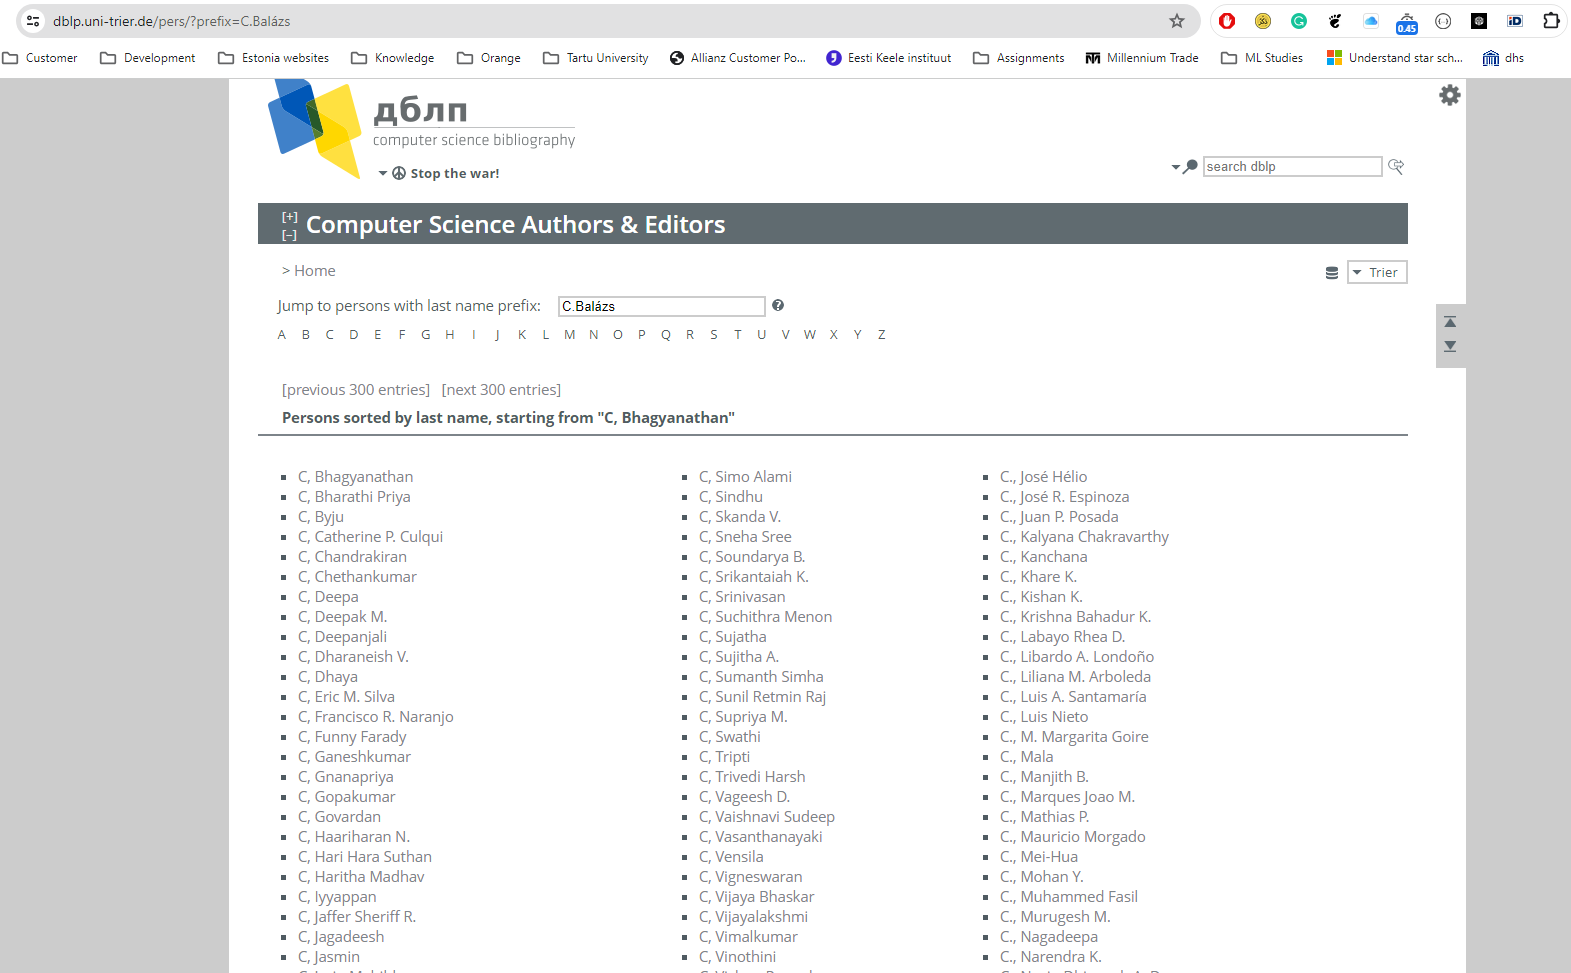

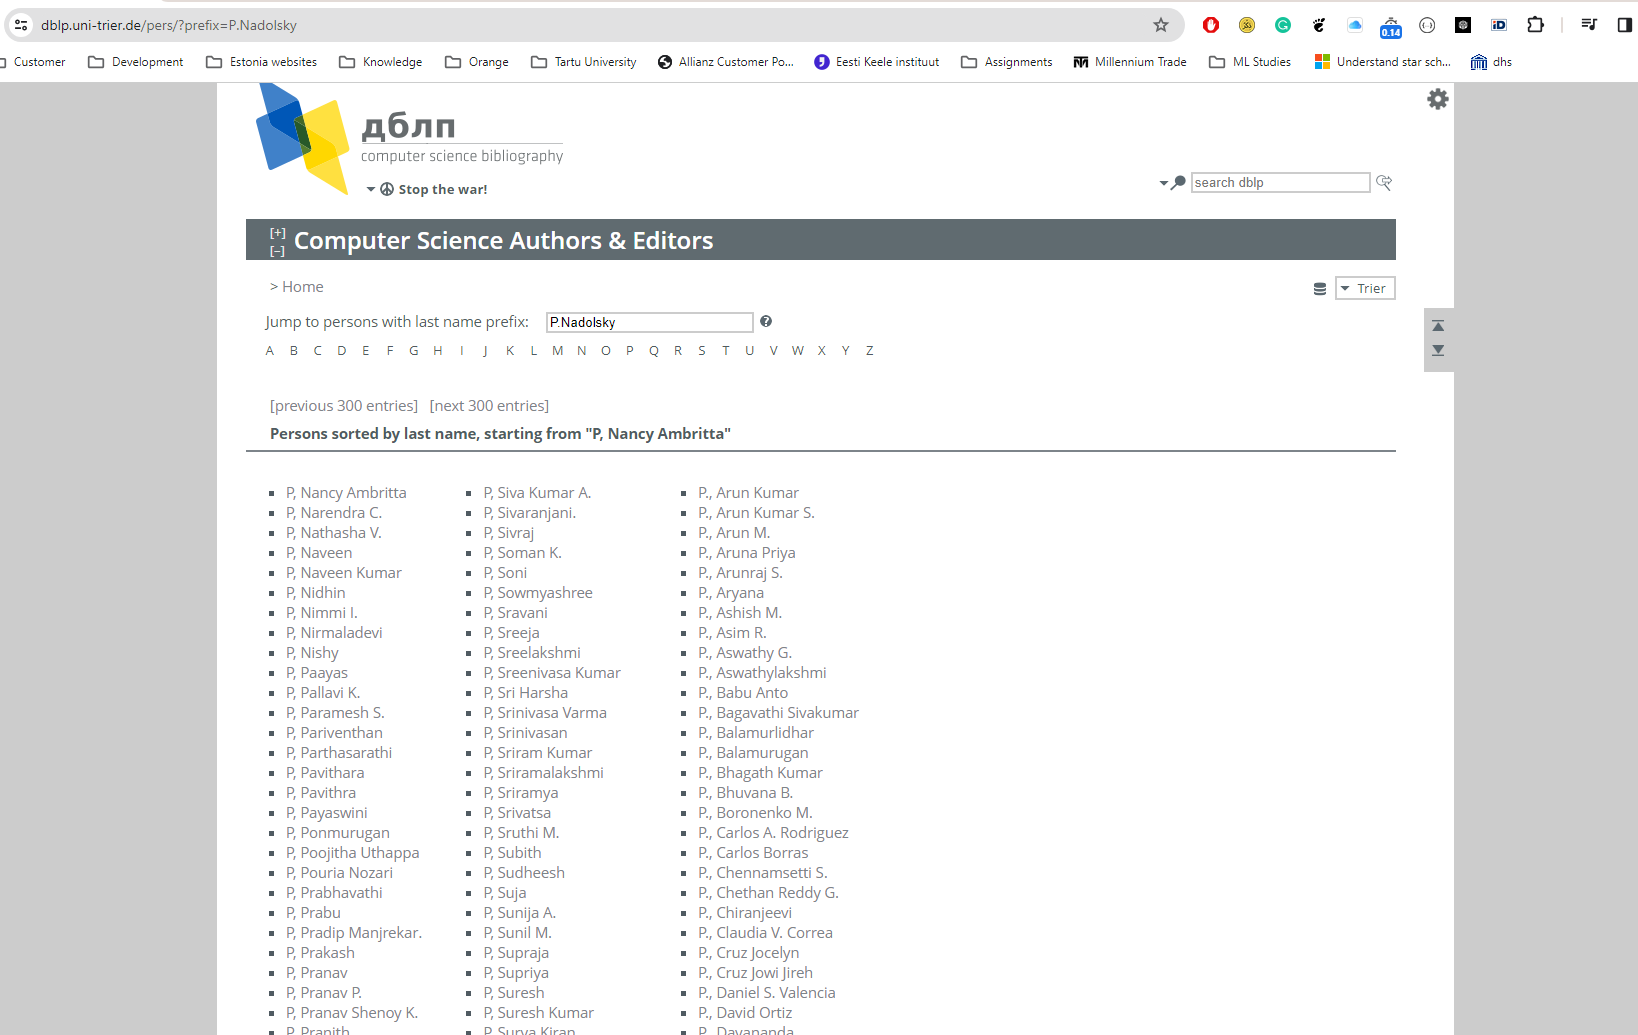

**Publisher** 

In [87]:
import requests

def get_publisher_metadata(pub_object):
    # Construct the API URL with the provided DOI
    api_url = f'https://dblp.org/search/publ/api/q={pub_object}'
    print (api_url)
    try:
        # Send GET request to the CrossRef API
        response = requests.get(api_url)
        print (response)
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse and return the JSON response
            return response
        else:
            # Print an error message if the request was not successful
            print(f"Error: {response.status_code} - {response.text}")
    except Exception as e:
        print(f"An error occurred: {e}")


pub_object = "American%20Physical%20Society"
pub_API = get_publisher_metadata(pub_object)
print (pub_API.text)

https://dblp.org/search/publ/api/q=American%20Physical%20Society
<Response [200]>
<?xml version="1.0" encoding="UTF-8"?>
<result>
<query id="516048"></query>
<status code="200">OK</status>
<time unit="msecs">0.03</time>
<completions total="53703642" computed="0" sent="0">
</completions>
<hits total="6997056" computed="0" sent="0" first="0">
</hits>
</result>

